## Part 1 - Consolidation
Pulling raw data tables and transforming them into final datasets

In [1]:
import pandas as pd
import os

In [2]:
!pip install mysql-connector-python
!pip install --user mysql-connector-python

import mysql.connector
conn = mysql.connector.connect(
    host="studentdb.crsqkeh7g4o2.us-east-2.rds.amazonaws.com",
    user="living_wage",
    password="LivingWage123!",
    database="giq_data",            # or "giq_data" for read-only
    port=3306,
    charset="utf8mb4",
    collation="utf8mb4_unicode_ci"
)
cursor = conn.cursor()
cursor.execute("SHOW TABLES;")
print(cursor.fetchall())
cursor.close()
conn.close()

  Using cached mysql_connector_python-9.5.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (7.5 kB)
Using cached mysql_connector_python-9.5.0-cp312-cp312-manylinux_2_28_x86_64.whl (34.1 MB)
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: '/home/ubuntu/jhub-venv/lib/python3.12/site-packages/_mysql_connector.cpython-312-x86_64-linux-gnu.so'
Check the permissions.

ERROR: Can not perform a '--user' install. User site-packages are not visible in this virtualenv.
[('benchmarking_data_part1',), ('benchmarking_data_part2',), ('benchmarking_data_part3',), ('benchmarking_data_part4',), ('benchmarking_data_part5a',), ('benchmarking_data_part5b',), ('compensation_data',), ('cost_estimate_data',), ('cost_estimate_data_part1',), ('cost_estimate_data_part10',), ('cost_estimate_data_part2',), ('cost_estimate_data_part3',), ('cost_estimate_data_part4',), ('cost_estimate_data_part5',), ('cost_estimate_data_part6',), ('cost_estimate_data_part7',), ('cost_estimate_data_

In [3]:
# Keeping only the relevant tables for Living Wage

import mysql.connector

RELEVANT = [
    "compensation_data",
    "exchange_rates_data",
    "expenditure_models_data",
    "gs_codes_data",
    "gs_codes_data_2",
    "gs_prices_data",
    "housing_rental_data",
    "location_data",
]

conn = mysql.connector.connect(
    host="studentdb.crsqkeh7g4o2.us-east-2.rds.amazonaws.com",
    user="living_wage",
    password="LivingWage123!",
    database="giq_data",
    port=3306,
    charset="utf8mb4",
    collation="utf8mb4_unicode_ci",
)
cursor = conn.cursor()

cursor.execute("SHOW TABLES;")
existing = {t[0] for t in cursor.fetchall()}
tables = [t for t in RELEVANT if t in existing]

for table_name in tables:
    print(f"\nTable: {table_name}")

    # Columns
    cursor.execute(f"DESCRIBE `{table_name}`;")
    cols = cursor.fetchall()
    col_names = [c[0] for c in cols]
    print(f"Columns ({len(col_names)}): {col_names}")

    # Row count
    cursor.execute(f"SELECT COUNT(*) FROM `{table_name}`;")
    row_count = cursor.fetchone()[0]
    print(f"Number of rows: {row_count}")

cursor.close()
conn.close()


Table: compensation_data
Columns (5): ['job_level', 'currency', 'base_pay', 'price_date', 'location_codes']
Number of rows: 1320

Table: exchange_rates_data
Columns (3): ['currency', 'rate', 'date']
Number of rows: 15943

Table: expenditure_models_data
Columns (7): ['location_codes', 'currency', 'type', 'num_of_adult', 'num_of_child', 'coefficient_a', 'coefficient_b']
Number of rows: 3668

Table: gs_codes_data
Columns (3): ['Master_Item_Codes', 'Final_Item', 'Category']
Number of rows: 122

Table: gs_codes_data_2
Columns (5): ['Master_Item_Codes', 'Final_Item', 'Category', 'Standard_Amounts', 'Standard_Units']
Number of rows: 122

Table: gs_prices_data
Columns (5): ['Location_Codes', 'Master_Item_Codes', 'Currency', 'Countries', 'Low_Price']
Number of rows: 15730

Table: housing_rental_data
Columns (8): ['location_codes', 'housing_codes', 'price_type', 'house_type', 'bedroom', 'currency', 'price', 'utilities']
Number of rows: 15648

Table: location_data
Columns (12): ['Location_Codes'

In [4]:
# Save tables as csv files for future work

import os
import pandas as pd
import mysql.connector

RELEVANT = [
    "compensation_data",
    "exchange_rates_data",
    "expenditure_models_data",
    "gs_codes_data",
    "gs_codes_data_2",
    "gs_prices_data",
    "housing_rental_data",
    "location_data",
]

OUTDIR = "./exports_csv"
os.makedirs(OUTDIR, exist_ok=True)

conn = mysql.connector.connect(
    host="studentdb.crsqkeh7g4o2.us-east-2.rds.amazonaws.com",
    user="living_wage",
    password="LivingWage123!",
    database="giq_data",
    port=3306,
    charset="utf8mb4",
    collation="utf8mb4_unicode_ci",
)

cur = conn.cursor()
cur.execute("SHOW TABLES;")
existing = {t[0] for t in cur.fetchall()}
tables = [t for t in RELEVANT if t in existing]
print("Will export:", tables)

for table in tables:
    print(f"Exporting {table} ...")
    df = pd.read_sql(f"SELECT * FROM `{table}`", con=conn)
    out_path = os.path.join(OUTDIR, f"{table}.csv")
    df.to_csv(out_path, index=False, encoding="utf-8")
    print(f"  -> {out_path} ({len(df):,} rows)")

cur.close()
conn.close()
print("Done.")

Will export: ['compensation_data', 'exchange_rates_data', 'expenditure_models_data', 'gs_codes_data', 'gs_codes_data_2', 'gs_prices_data', 'housing_rental_data', 'location_data']
Exporting compensation_data ...
  -> ./exports_csv/compensation_data.csv (1,320 rows)
Exporting exchange_rates_data ...
  -> ./exports_csv/exchange_rates_data.csv (15,943 rows)
Exporting expenditure_models_data ...
  -> ./exports_csv/expenditure_models_data.csv (3,668 rows)
Exporting gs_codes_data ...
  -> ./exports_csv/gs_codes_data.csv (122 rows)
Exporting gs_codes_data_2 ...
  -> ./exports_csv/gs_codes_data_2.csv (122 rows)
Exporting gs_prices_data ...


/tmp/ipykernel_751824/3656756256.py:39: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM `{table}`", con=conn)


  -> ./exports_csv/gs_prices_data.csv (15,730 rows)
Exporting housing_rental_data ...
  -> ./exports_csv/housing_rental_data.csv (15,648 rows)
Exporting location_data ...
  -> ./exports_csv/location_data.csv (1,326 rows)
Done.


In [5]:
# Load csv files of key tables as df-s

import pandas as pd
from pathlib import Path

DATA_DIR = Path("./exports_csv")

files = {
    "codes": DATA_DIR / "gs_codes_data_2.csv",
    "prices": DATA_DIR / "gs_prices_data.csv",
    "housing": DATA_DIR / "housing_rental_data.csv",
    "locs": DATA_DIR / "location_data.csv",
}

read_opts = dict(encoding="utf-8", dtype=str, keep_default_na=True, na_values=["", "NA", "NaN", "null", "NULL"])

codes   = pd.read_csv(files["codes"], **read_opts)
prices  = pd.read_csv(files["prices"], **read_opts)
housing = pd.read_csv(files["housing"], **read_opts)
locs    = pd.read_csv(files["locs"], **read_opts)

print("Loaded shapes:",
      "\n  codes  :", codes.shape,
      "\n  prices :", prices.shape,
      "\n  housing:", housing.shape,
      "\n  locs   :", locs.shape)

print("\n— codes.head() —")
display(codes.head())

print("\n— prices.head() —")
display(prices.head())

print("\n— housing.head() —")
display(housing.head())

print("\n— locs.head() —")
display(locs.head())

Loaded shapes: 
  codes  : (122, 5) 
  prices : (15730, 5) 
  housing: (15648, 8) 
  locs   : (1326, 12)

— codes.head() —


,Master_Item_Codes,Final_Item,Category,Standard_Amounts,Standard_Units
0,001-001-0000,Beef and Veal,Food and Non-Alcoholic beverages,250.0,G
1,001-002-0000,Pork,Food and Non-Alcoholic beverages,500.0,G
2,001-003-0000,Lamb,Food and Non-Alcoholic beverages,500.0,G
3,001-004-0000,Chicken,Food and Non-Alcoholic beverages,500.0,G
4,001-005-0000,Cured Meat,Food and Non-Alcoholic beverages,125.0,G



— prices.head() —


,Location_Codes,Master_Item_Codes,Currency,Countries,Low_Price
0,002-000-0000-0000,001-001-0000,ALL,Albania,748.4
1,002-000-0000-0000,001-002-0000,ALL,Albania,445.44
2,002-000-0000-0000,001-003-0000,ALL,Albania,889.76
3,002-000-0000-0000,001-004-0000,ALL,Albania,392.78
4,002-000-0000-0000,001-005-0000,ALL,Albania,193.2



— housing.head() —


,location_codes,housing_codes,price_type,house_type,bedroom,currency,price,utilities
0,002-000-0000-0000,001-001-001,Rent,Apartment,1,ALL,42296.43,14643.36
1,002-000-0000-0000,001-001-002,Rent,Apartment,2,ALL,56798.97,17287.25
2,002-000-0000-0000,001-001-003,Rent,Apartment,3,ALL,77259.56,18987.5
3,002-000-0000-0000,001-001-004,Rent,Apartment,4,ALL,104424.14,20632.69
4,002-000-0000-0000,001-001-005,Rent,Apartment,5,ALL,145328.38,22246.87



— locs.head() —


,Location_Codes,City,Province,Country,City_Province_Country,Country_Codes,Province_Codes,Metropolitan_Codes,ISO_3166_Alpha_2,ISO_3166_Alpha_3,ISO_4217_Currency_Name,ISO_4217_Alphabetic_Codes
0,002-011-0001-0000,Tirana,Tirana,Albania,"Tirana, Tirana, Albania",2,11,1,AL,ALB,Lek,ALL
1,002-007-0002-0000,Korçë,Korçë,Albania,"Korçë, Korçë, Albania",2,7,2,AL,ALB,Lek,ALL
2,002-012-0003-0000,Vlorë,Vlorë,Albania,"Vlorë, Vlorë, Albania",2,12,3,AL,ALB,Lek,ALL
3,002-012-0004-0000,Sarandë,Vlorë,Albania,"Sarandë, Vlorë, Albania",2,12,4,AL,ALB,Lek,ALL
4,002-010-0005-0000,Shkodër,Shkodër,Albania,"Shkodër, Shkodër, Albania",2,10,5,AL,ALB,Lek,ALL


In [6]:
# Checking for null values before consolidating some df-s

def null_report(df, name):
    print(f"\n NULL report: {name} (shape={df.shape})")
    na_counts = df.isna().sum()
    if na_counts.sum() == 0:
        print("No NULLs detected")
    else:
        print(na_counts[na_counts > 0].sort_values(ascending=False))

null_report(codes, "codes")
null_report(prices, "prices")
null_report(housing, "housing")
null_report(locs, "location_data")


 NULL report: codes (shape=(122, 5))
No NULLs detected

 NULL report: prices (shape=(15730, 5))
No NULLs detected

 NULL report: housing (shape=(15648, 8))
No NULLs detected

 NULL report: location_data (shape=(1326, 12))
ISO_3166_Alpha_2    2
dtype: int64


In [7]:
# Merging the prices and codes df via Master_Item_Codes

# Convert numeric-like fields to float for safety
prices["Low_Price"] = pd.to_numeric(prices["Low_Price"], errors="coerce")
codes["Standard_Amounts"] = pd.to_numeric(codes["Standard_Amounts"], errors="coerce")

merged_items = prices.merge(
    codes,
    on="Master_Item_Codes",
    how="left",  # should be many-to-one
    validate="many_to_one"
)

print("Merged shape:", merged_items.shape)
print("Unmatched rows (where no code info found):",
      merged_items["Final_Item"].isna().sum())

display(merged_items.head())

Merged shape: (15730, 9)
Unmatched rows (where no code info found): 0


,Location_Codes,Master_Item_Codes,Currency,Countries,Low_Price,Final_Item,Category,Standard_Amounts,Standard_Units
0,002-000-0000-0000,001-001-0000,ALL,Albania,748.40,Beef and Veal,Food and Non-Alcoholic beverages,250.0,G
1,002-000-0000-0000,001-002-0000,ALL,Albania,445.44,Pork,Food and Non-Alcoholic beverages,500.0,G
2,002-000-0000-0000,001-003-0000,ALL,Albania,889.76,Lamb,Food and Non-Alcoholic beverages,500.0,G
3,002-000-0000-0000,001-004-0000,ALL,Albania,392.78,Chicken,Food and Non-Alcoholic beverages,500.0,G
4,002-000-0000-0000,001-005-0000,ALL,Albania,193.20,Cured Meat,Food and Non-Alcoholic beverages,125.0,G


In [8]:
# Adding the housing prices in
# Baseline 1 adult for now: 1-bedroom apartment & 1-bedroom house rental average for each country ( price & utilities)

h = housing.copy()

# Basic cleaning/casts just for the needed columns
h = h[h["price_type"].str.casefold() == "rent"]
h["bedroom_num"] = pd.to_numeric(h["bedroom"], errors="coerce")
h["price"]      = pd.to_numeric(h["price"], errors="coerce")
h["utilities"]  = pd.to_numeric(h["utilities"], errors="coerce")

# 1) Apartment, 1-bedroom
apt1 = h[(h["house_type"].str.casefold() == "apartment") & (h["bedroom_num"] == 1)]
apt1_agg = (
    apt1.groupby("location_codes", as_index=False)
        .agg(
            apt1_price_mean=("price", "mean"),
            apt1_util_mean=("utilities", "mean"),
            apt1_rows=("price", "size"),
            apt1_currency_most=("currency", lambda s: s.mode().iat[0] if not s.mode().empty else np.nan),
        )
)

# 2) House, 1 bedroom
house1 = h[(h["house_type"].str.casefold() == "house") & (h["bedroom_num"] == 1)]
house1_agg = (
    house1.groupby("location_codes", as_index=False)
          .agg(
              house1_price_mean=("price", "mean"),
              house1_util_mean=("utilities", "mean"),
              house1_rows=("price", "size"),
              house1_currency_most=("currency", lambda s: s.mode().iat[0] if not s.mode().empty else np.nan),
          )
)

# Merge the two housing summaries together
housing_agg = apt1_agg.merge(house1_agg, on="location_codes", how="outer")
print("housing_agg shape:", housing_agg.shape)
display(housing_agg.head())

housing_agg shape: (128, 9)


,location_codes,apt1_price_mean,apt1_util_mean,apt1_rows,apt1_currency_most,house1_price_mean,house1_util_mean,house1_rows,house1_currency_most
0,002-000-0000-0000,42171.775714,14643.36,7,ALL,62187.088571,17999.65,7,ALL
1,003-000-0000-0000,27775.263333,17546.27,3,DZD,97845.563333,19397.97,3,DZD
2,004-000-0000-0000,747.060000,71.53,1,EUR,1110.230000,88.95,1,EUR
3,005-000-0000-0000,710388.446667,74197.53,3,AOA,935844.613333,81994.79,3,AOA
4,007-000-0000-0000,51866.596250,15506.10,8,ARS,77487.375000,18871.58,8,ARS


In [9]:
# Exchange rate dataset - get rolling 30-day average for each country to standardize all currencies into USD

exr = pd.read_csv("./exports_csv/exchange_rates_data.csv", dtype=str, encoding="utf-8")

# Prepare columns
exr["rate"] = pd.to_numeric(exr["rate"], errors="coerce")
exr["date"] = pd.to_datetime(exr["date"], errors="coerce", utc=True)

# Drop unusable rows
exr_clean = exr.dropna(subset=["currency", "rate", "date"]).copy()

# Sort before rolling
exr_clean = exr_clean.sort_values(["currency", "date"])

# Rolling window = last 4 observations per currency (to get 30-day rolling avg as each observation is a weekly value) 
exr_clean["rate_roll4"] = (
    exr_clean.groupby("currency")["rate"]
             .transform(lambda x: x.rolling(window=4, min_periods=1).mean())
)

# Keep only the latest record (per currency)
exr_roll4_latest = (
    exr_clean.sort_values(["currency", "date"])
             .drop_duplicates(subset=["currency"], keep="last")
             .reset_index(drop=True)
)

# Convert date column to YYYY-MM-DD string
exr_roll4_latest["date"] = exr_roll4_latest["date"].dt.date

# Preview
print("Snapshot shape:", exr_roll4_latest.shape)
display(exr_roll4_latest.head())

Snapshot shape: (172, 4)


,currency,rate,date,rate_roll4
0,AED,3.67,2025-10-19,3.6700
1,AFN,66.70,2025-10-19,66.9025
2,ALL,82.91,2025-10-19,82.8150
3,AMD,385.17,2025-10-19,382.8200
4,ANG,1.79,2025-10-19,1.7900


In [10]:
# Filtering only for currencies that we need (in the prices x housing df-s)
relevant = set(prices["Currency"].dropna()) | set(housing["currency"].dropna())
exr_roll4_relevant = exr_roll4_latest[exr_roll4_latest["currency"].isin(relevant)].copy()

In [11]:
print("Snapshot shape:", exr_roll4_relevant.shape)
display(exr_roll4_relevant.head())

Snapshot shape: (98, 4)


,currency,rate,date,rate_roll4
0,AED,3.67,2025-10-19,3.670
2,ALL,82.91,2025-10-19,82.815
3,AMD,385.17,2025-10-19,382.820
4,ANG,1.79,2025-10-19,1.790
5,AOA,917.00,2025-10-19,917.000


In [12]:
# Transforming the housing dataframe: standardizing currencies into USD
import numpy as np
exr_relevant = exr_roll4_relevant.copy()

# 1) Currency reconciliation
ha = housing_agg.copy()

# How often do the two currency modes disagree?
mismatch_mask = (
    ha["apt1_currency_most"].notna()
    & ha["house1_currency_most"].notna()
    & (ha["apt1_currency_most"] != ha["house1_currency_most"])
)
print("Currency mismatches:", int(mismatch_mask.sum()))

# Create a single 'currency' column:
# If both equal, then that value
# Else prefer apt1_currency_most if present, else house1_currency_most
ha["currency"] = np.where(
    (ha["apt1_currency_most"].notna()) & (ha["apt1_currency_most"] == ha["house1_currency_most"]),
    ha["apt1_currency_most"],
    ha["apt1_currency_most"].fillna(ha["house1_currency_most"])
)

# Keep a flag so we can review odd cases later
ha["currency_mismatch_flag"] = mismatch_mask

# Optional: if you want to drop the original two columns after you inspect them:
# ha.drop(columns=["apt1_currency_most", "house1_currency_most"], inplace=True)

# 2) Merge exchange rates (4-week rolling latest)
rates = exr_relevant[["currency", "rate_roll4"]].drop_duplicates("currency")
ha = ha.merge(rates, on="currency", how="left")

# Quick checks
missing_rate = ha["rate_roll4"].isna().sum()
zero_or_neg  = ((ha["rate_roll4"] <= 0) & ha["rate_roll4"].notna()).sum()
print(f"Rows missing rate: {missing_rate}")
print(f"Rows with zero/neg rate: {zero_or_neg}")

# 3) Convert to USD (divide by rate)
for src, dst in [
    ("apt1_price_mean",  "apt1_price_usd"),
    ("apt1_util_mean",   "apt1_util_usd"),
    ("house1_price_mean","house1_price_usd"),
    ("house1_util_mean", "house1_util_usd"),
]:
    if src in ha.columns:
        ha[dst] = ha[src] / ha["rate_roll4"]

# 4) (Optional) Round for readability (without losing raw columns)
for col in ["apt1_price_usd","apt1_util_usd","house1_price_usd","house1_util_usd"]:
    if col in ha.columns:
        ha[col] = ha[col].round(2)

print("Converted sample:")
display(ha.head(10))

# 5) Save for downstream use
out_path = "./exports_csv/housing_agg_usd.csv"
ha.to_csv(out_path, index=False)
print("Saved:", out_path)


Currency mismatches: 0
Rows missing rate: 4
Rows with zero/neg rate: 0
Converted sample:


,location_codes,apt1_price_mean,apt1_util_mean,apt1_rows,apt1_currency_most,house1_price_mean,house1_util_mean,house1_rows,house1_currency_most,currency,currency_mismatch_flag,rate_roll4,apt1_price_usd,apt1_util_usd,house1_price_usd,house1_util_usd
0,002-000-0000-0000,42171.775714,14643.36,7,ALL,62187.088571,17999.65,7,ALL,ALL,False,82.8150,509.23,176.82,750.92,217.35
1,003-000-0000-0000,27775.263333,17546.27,3,DZD,97845.563333,19397.97,3,DZD,DZD,False,129.6675,214.20,135.32,754.59,149.60
2,004-000-0000-0000,747.060000,71.53,1,EUR,1110.230000,88.95,1,EUR,EUR,False,0.8550,873.75,83.66,1298.51,104.04
3,005-000-0000-0000,710388.446667,74197.53,3,AOA,935844.613333,81994.79,3,AOA,AOA,False,917.0000,774.69,80.91,1020.55,89.42
4,007-000-0000-0000,51866.596250,15506.10,8,ARS,77487.375000,18871.58,8,ARS,ARS,False,1397.5050,37.11,11.10,55.45,13.50
5,008-000-0000-0000,298100.050000,29206.89,4,AMD,403529.807500,32109.78,4,AMD,AMD,False,382.8200,778.70,76.29,1054.10,83.88
6,009-000-0000-0000,1501.669048,110.41,21,AUD,2501.800476,123.62,21,AUD,AUD,False,1.5275,983.09,72.28,1637.84,80.93
7,010-000-0000-0000,659.725000,81.40,6,EUR,868.285000,83.34,6,EUR,EUR,False,0.8550,771.61,95.20,1015.54,97.47
8,011-000-0000-0000,347.165000,58.47,4,AZN,447.780000,64.29,4,AZN,AZN,False,1.7000,204.21,34.39,263.40,37.82
9,013-000-0000-0000,287.290000,17.15,1,BHD,325.920000,22.06,1,BHD,BHD,False,0.3800,756.03,45.13,857.68,58.05


Saved: ./exports_csv/housing_agg_usd.csv


In [13]:
# Housing_agg dataframe - consolidating the two currencies into one if the values are identical

ha = housing_agg.copy()

a = ha["apt1_currency_most"]
b = ha["house1_currency_most"]

# Match if equal OR both NaN
match_mask = (a == b) | (a.isna() & b.isna())
mismatch_mask = ~match_mask

total = len(ha)
mismatches = int(mismatch_mask.sum())
print(f"Total rows: {total}")
print(f"Mismatches: {mismatches}")

Total rows: 128
Mismatches: 0


In [14]:
ha["foreign_currency"] = a.combine_first(b)
ha.drop(columns=["apt1_currency_most", "house1_currency_most"], inplace=True)
display(ha.head())

,location_codes,apt1_price_mean,apt1_util_mean,apt1_rows,house1_price_mean,house1_util_mean,house1_rows,foreign_currency
0,002-000-0000-0000,42171.775714,14643.36,7,62187.088571,17999.65,7,ALL
1,003-000-0000-0000,27775.263333,17546.27,3,97845.563333,19397.97,3,DZD
2,004-000-0000-0000,747.060000,71.53,1,1110.230000,88.95,1,EUR
3,005-000-0000-0000,710388.446667,74197.53,3,935844.613333,81994.79,3,AOA
4,007-000-0000-0000,51866.596250,15506.10,8,77487.375000,18871.58,8,ARS


In [15]:
# Transforming the housing dataframe: standardizing currencies into USD

exr_latest = exr_roll4_relevant.copy()

# Keep only currency name and rolling average value
rates = (exr_latest[["currency", "rate_roll4"]]
         .drop_duplicates("currency")
         .rename(columns={"currency": "foreign_currency"}))

# Merge rates into housing aggregates
ha_usd = ha.merge(rates, on="foreign_currency", how="left")

# Safety (if USD rows exist but rate missing, set to 1.0)
mask_usd_missing = (ha_usd["foreign_currency"] == "USD") & (ha_usd["rate_roll4"].isna())
ha_usd.loc[mask_usd_missing, "rate_roll4"] = 1.0

# Quick diagnostics
missing_rate = ha_usd["rate_roll4"].isna().sum()
if missing_rate:
    print(f"Warning, {missing_rate} rows have no matching roll-4 rate. Examples:")
    display(ha_usd.loc[ha_usd["rate_roll4"].isna(), ["location_codes","foreign_currency"]].head())

# Convert price/utilities to USD (divide by roll-4 rate)
for src, dst in [
    ("apt1_price_mean",   "apt1_price_usd"),
    ("apt1_util_mean",    "apt1_util_usd"),
    ("house1_price_mean", "house1_price_usd"),
    ("house1_util_mean",  "house1_util_usd"),
]:
    if src in ha_usd.columns:
        ha_usd[dst] = ha_usd[src] / ha_usd["rate_roll4"]

# Round USD columns for readability
for col in ["apt1_price_usd","apt1_util_usd","house1_price_usd","house1_util_usd"]:
    if col in ha_usd.columns:
        ha_usd[col] = ha_usd[col].round(2)

print("Converted sample:")
display(ha_usd.head(10))

Converted sample:


,location_codes,apt1_price_mean,apt1_util_mean,apt1_rows,house1_price_mean,house1_util_mean,house1_rows,foreign_currency,rate_roll4,apt1_price_usd,apt1_util_usd,house1_price_usd,house1_util_usd
0,002-000-0000-0000,42171.775714,14643.36,7,62187.088571,17999.65,7,ALL,82.8150,509.23,176.82,750.92,217.35
1,003-000-0000-0000,27775.263333,17546.27,3,97845.563333,19397.97,3,DZD,129.6675,214.20,135.32,754.59,149.60
2,004-000-0000-0000,747.060000,71.53,1,1110.230000,88.95,1,EUR,0.8550,873.75,83.66,1298.51,104.04
3,005-000-0000-0000,710388.446667,74197.53,3,935844.613333,81994.79,3,AOA,917.0000,774.69,80.91,1020.55,89.42
4,007-000-0000-0000,51866.596250,15506.10,8,77487.375000,18871.58,8,ARS,1397.5050,37.11,11.10,55.45,13.50
5,008-000-0000-0000,298100.050000,29206.89,4,403529.807500,32109.78,4,AMD,382.8200,778.70,76.29,1054.10,83.88
6,009-000-0000-0000,1501.669048,110.41,21,2501.800476,123.62,21,AUD,1.5275,983.09,72.28,1637.84,80.93
7,010-000-0000-0000,659.725000,81.40,6,868.285000,83.34,6,EUR,0.8550,771.61,95.20,1015.54,97.47
8,011-000-0000-0000,347.165000,58.47,4,447.780000,64.29,4,AZN,1.7000,204.21,34.39,263.40,37.82
9,013-000-0000-0000,287.290000,17.15,1,325.920000,22.06,1,BHD,0.3800,756.03,45.13,857.68,58.05


In [16]:
# Final housing dataset - one total (price + utilities) average price for apartment and house for each country in usd

req_cols = [
    "location_codes", "foreign_currency", "rate_roll4",
    "apt1_price_usd", "apt1_util_usd",
    "house1_price_usd", "house1_util_usd",
]
missing = [c for c in req_cols if c not in ha_usd.columns]
assert not missing, f"Missing columns in ha_usd: {missing}"

final_df = ha_usd.copy()

# Ensure numeric for math
for c in ["apt1_price_usd", "apt1_util_usd", "house1_price_usd", "house1_util_usd", "rate_roll4"]:
    final_df[c] = pd.to_numeric(final_df[c], errors="coerce")

# Compute totals
final_df["apt_cost_total"] = final_df["apt1_price_usd"].fillna(0) + final_df["apt1_util_usd"].fillna(0)
final_df["house_cost_total"] = final_df["house1_price_usd"].fillna(0) + final_df["house1_util_usd"].fillna(0)

# Rounding for readability
final_df["apt_cost_total"] = final_df["apt_cost_total"].round(2)
final_df["house_cost_total"] = final_df["house_cost_total"].round(2)

# Keep only specific columns
final_df = final_df[[
    "location_codes", "foreign_currency", "rate_roll4",
    "apt_cost_total", "house_cost_total"
]]

print(final_df.shape)
display(final_df.head(10))

(128, 5)


,location_codes,foreign_currency,rate_roll4,apt_cost_total,house_cost_total
0,002-000-0000-0000,ALL,82.8150,686.05,968.27
1,003-000-0000-0000,DZD,129.6675,349.52,904.19
2,004-000-0000-0000,EUR,0.8550,957.41,1402.55
3,005-000-0000-0000,AOA,917.0000,855.60,1109.97
4,007-000-0000-0000,ARS,1397.5050,48.21,68.95
5,008-000-0000-0000,AMD,382.8200,854.99,1137.98
6,009-000-0000-0000,AUD,1.5275,1055.37,1718.77
7,010-000-0000-0000,EUR,0.8550,866.81,1113.01
8,011-000-0000-0000,AZN,1.7000,238.60,301.22
9,013-000-0000-0000,BHD,0.3800,801.16,915.73


In [17]:
# Save
out_path = "./baseline_housing_costs_usd.csv"
final_df.to_csv(out_path, index=False)
print("Saved:", out_path)

Saved: ./baseline_housing_costs_usd.csv


In [18]:
# Standardizing currency into USD in the merged_items df (includes all costs apart from housing)

mi = merged_items.copy()

# Rename & select currency
mi = mi.rename(columns={"Low_Price": "foreign_low_price", "Currency": "foreign_currency"})

# Ensure numeric price
mi["foreign_low_price"] = pd.to_numeric(mi["foreign_low_price"], errors="coerce")

rates = (exr_latest[["currency", "rate_roll4"]]
         .drop_duplicates("currency")
         .rename(columns={"currency": "foreign_currency"}))

# Merge rates
mi_usd = mi.merge(rates, on="foreign_currency", how="left")

# If USD present with missing rate, set to 1.0
mask_usd_missing = (mi_usd["foreign_currency"] == "USD") & (mi_usd["rate_roll4"].isna())
mi_usd.loc[mask_usd_missing, "rate_roll4"] = 1.0

# Diagnostics
missing_rate = mi_usd["rate_roll4"].isna().sum()
if missing_rate:
    print(f"Warning, {missing_rate} rows missing roll-4 rate. Examples:")
    display(mi_usd.loc[mi_usd["rate_roll4"].isna(),
                       ["Location_Codes","foreign_currency","foreign_low_price"]].head(10))

# Computing USD price
mi_usd["usd_low_price"] = mi_usd["foreign_low_price"] / mi_usd["rate_roll4"]

# Rounding
mi_usd["usd_low_price"] = mi_usd["usd_low_price"].round(4)

# Keeping only relevant columns
final_item_prices = mi_usd[[
    "Location_Codes",
    "Countries",
    "Master_Item_Codes",
    "Final_Item",
    "Category",
    "Standard_Amounts",
    "Standard_Units",
    "foreign_currency",
    "rate_roll4",
    "foreign_low_price",
    "usd_low_price",
]]

print(final_item_prices.shape)
display(final_item_prices.head(3))

(15730, 11)


,Location_Codes,Countries,Master_Item_Codes,Final_Item,Category,Standard_Amounts,Standard_Units,foreign_currency,rate_roll4,foreign_low_price,usd_low_price
0,002-000-0000-0000,Albania,001-001-0000,Beef and Veal,Food and Non-Alcoholic beverages,250.0,G,ALL,82.815,748.40,9.0370
1,002-000-0000-0000,Albania,001-002-0000,Pork,Food and Non-Alcoholic beverages,500.0,G,ALL,82.815,445.44,5.3787
2,002-000-0000-0000,Albania,001-003-0000,Lamb,Food and Non-Alcoholic beverages,500.0,G,ALL,82.815,889.76,10.7439


In [19]:
# Remove unneccesary foreign currency related columns

final_item_prices = mi_usd[[
    "Location_Codes",
    "Countries",
    "Master_Item_Codes",
    "Final_Item",
    "Category",
    "Standard_Amounts",
    "Standard_Units",
    "usd_low_price",
]]

In [20]:
print(final_item_prices.shape)
display(final_item_prices.head(3))

(15730, 8)


,Location_Codes,Countries,Master_Item_Codes,Final_Item,Category,Standard_Amounts,Standard_Units,usd_low_price
0,002-000-0000-0000,Albania,001-001-0000,Beef and Veal,Food and Non-Alcoholic beverages,250.0,G,9.0370
1,002-000-0000-0000,Albania,001-002-0000,Pork,Food and Non-Alcoholic beverages,500.0,G,5.3787
2,002-000-0000-0000,Albania,001-003-0000,Lamb,Food and Non-Alcoholic beverages,500.0,G,10.7439


In [21]:
# Checking standard units types and value counts
final_item_prices["Standard_Units"].unique()

array(['G', 'Unit', 'L'], dtype=object)

In [22]:
food_df = final_item_prices[final_item_prices["Category"] == "Food and Non-Alcoholic beverages"].copy()
print(food_df.shape)

(5460, 8)


In [23]:
food_item_unit_map = (
    food_df.groupby("Final_Item")[["Standard_Amounts", "Standard_Units"]]
           .first()
           .reset_index()
)

print("Number of unique food items:", food_item_unit_map.shape[0])

Number of unique food items: 42


In [24]:
food_item_unit_map.head(42)

,Final_Item,Standard_Amounts,Standard_Units
0,Baby Food,500.0,G
1,Beans,500.0,G
2,Beef and Veal,250.0,G
3,Bottled Water,1.5,L
4,Bread,500.0,G
5,Butter,500.0,G
6,Canned Tuna,125.0,G
7,Canned fish,125.0,G
8,Cereal,500.0,G
9,Cheese,250.0,G


In [25]:
# Uploading the food composition table completed for the food items(taken from https://nutritionix.com/)

food_comp = pd.read_excel("Global_IQ_Food_Composition_Table.xlsx")

print(food_comp.head())
print(food_comp.columns)

            ITEM  Energy_kcal  Protein  Carbs   Fat
0  Beef and Veal        646.7     0.41   0.00  0.59
1           Pork       1187.5     0.46   0.00  0.54
2           Lamb       1469.7     0.34   0.00  0.66
3        Chicken       1099.3     0.45   0.00  0.55
4     Cured Meat        427.1     0.26   0.03  0.71
Index(['ITEM', 'Energy_kcal', 'Protein', 'Carbs', 'Fat'], dtype='object')


In [26]:
food_item_final = food_item_unit_map.merge(
    food_comp,
    left_on="Final_Item",
    right_on="ITEM",
    how="left"
)
food_item_final = food_item_final.drop(columns=["ITEM"])
display(food_item_final.head())

,Final_Item,Standard_Amounts,Standard_Units,Energy_kcal,Protein,Carbs,Fat
0,Baby Food,500.0,G,256.3,0.03,0.85,0.12
1,Beans,500.0,G,470.5,0.18,0.79,0.03
2,Beef and Veal,250.0,G,646.7,0.41,0.00,0.59
3,Bottled Water,1.5,L,0.0,0.00,0.00,0.00
4,Bread,500.0,G,1327.6,0.13,0.76,0.11


In [27]:
# Check for missing values
missing_nutrition = food_item_final[food_item_final["Energy_kcal"].isna()]
print("Items without nutritional match:", missing_nutrition.shape[0])
display(missing_nutrition.head(10))

Items without nutritional match: 0


,Final_Item,Standard_Amounts,Standard_Units,Energy_kcal,Protein,Carbs,Fat


In [28]:
food_item_final.to_csv("./food_item_unit_with_nutrition.csv", index=False)
print("Saved: ./food_item_unit_with_nutrition.csv")

Saved: ./food_item_unit_with_nutrition.csv


In [29]:
import pandas as pd

# Load main dataset faostat
fbs = pd.read_csv("FoodBalanceSheets_E_All_Data.csv", encoding="latin1")

print(fbs.shape)
print(fbs.columns)
fbs.head()

(373670, 51)
Index(['Area Code', 'Area Code (M49)', 'Area', 'Item Code', 'Item Code (FBS)',
       'Item', 'Element Code', 'Element', 'Unit', 'Y2010', 'Y2010F', 'Y2010N',
       'Y2011', 'Y2011F', 'Y2011N', 'Y2012', 'Y2012F', 'Y2012N', 'Y2013',
       'Y2013F', 'Y2013N', 'Y2014', 'Y2014F', 'Y2014N', 'Y2015', 'Y2015F',
       'Y2015N', 'Y2016', 'Y2016F', 'Y2016N', 'Y2017', 'Y2017F', 'Y2017N',
       'Y2018', 'Y2018F', 'Y2018N', 'Y2019', 'Y2019F', 'Y2019N', 'Y2020',
       'Y2020F', 'Y2020N', 'Y2021', 'Y2021F', 'Y2021N', 'Y2022', 'Y2022F',
       'Y2022N', 'Y2023', 'Y2023F', 'Y2023N'],
      dtype='object')


,Area Code,Area Code (M49),Area,Item Code,Item Code (FBS),Item,Element Code,Element,Unit,Y2010,...,Y2020N,Y2021,Y2021F,Y2021N,Y2022,Y2022F,Y2022N,Y2023,Y2023F,Y2023N
0,2,'004,Afghanistan,2501,'S2501,Population,511,Total Population - Both sexes,1000 No,28284.09,...,NaN,40000.41,X,NaN,40578.84,X,NaN,41454.76,X,NaN
1,2,'004,Afghanistan,2901,'S2901,Grand Total,664,Food supply (kcal/capita/day),kcal/cap/d,2200.21,...,NaN,2244.73,E,NaN,2268.63,E,NaN,2314.63,E,NaN
2,2,'004,Afghanistan,2901,'S2901,Grand Total,661,Food supply (kcal),million Kcal,22714261.33,...,NaN,32773345.26,E,NaN,33601287.96,E,NaN,35022662.41,E,NaN
3,2,'004,Afghanistan,2901,'S2901,Grand Total,674,Protein supply quantity (g/capita/day),g/cap/d,65.54,...,NaN,61.36,E,NaN,61.55,E,NaN,62.58,E,NaN
4,2,'004,Afghanistan,2901,'S2901,Grand Total,671,Protein supply quantity (t),t,676666.08,...,NaN,895904.37,E,NaN,911681.15,E,NaN,946916.80,E,NaN


In [30]:
import pandas as pd
import numpy as np
import re

# Choose ONE element for diet composition features
TARGET_ELEMENT = "Food supply (kcal/capita/day)"

f = fbs[fbs["Element"] == TARGET_ELEMENT].copy()

# Keep only Y#### value columns (drop F/N flag columns)
year_cols = [c for c in f.columns if re.fullmatch(r"Y\d{4}", c)]
keep_cols = ["Area Code", "Area", "Item Code", "Item", "Element", "Unit"] + year_cols
f = f[keep_cols]

# Unpivot to long
long = f.melt(
    id_vars=["Area Code", "Area", "Item Code", "Item", "Element", "Unit"],
    value_vars=year_cols,
    var_name="Year",
    value_name="Value"
)

# Clean year to int and coerce numeric
long["Year"] = long["Year"].str[1:].astype(int)
long["Value"] = pd.to_numeric(long["Value"], errors="coerce")
long = long.dropna(subset=["Value"])
print(long.head())

   Area Code         Area  Item Code                      Item  \
0          2  Afghanistan       2901               Grand Total   
1          2  Afghanistan       2903          Vegetal Products   
2          2  Afghanistan       2941           Animal Products   
3          2  Afghanistan       2905  Cereals - Excluding Beer   
4          2  Afghanistan       2511        Wheat and products   

                         Element        Unit  Year    Value  
0  Food supply (kcal/capita/day)  kcal/cap/d  2010  2200.21  
1  Food supply (kcal/capita/day)  kcal/cap/d  2010  2000.82  
2  Food supply (kcal/capita/day)  kcal/cap/d  2010   199.39  
3  Food supply (kcal/capita/day)  kcal/cap/d  2010  1648.94  
4  Food supply (kcal/capita/day)  kcal/cap/d  2010  1464.44  


In [31]:
# Use the latest year present
latest_year = long["Year"].max()
long_latest = long[long["Year"] == latest_year].copy()

diet_matrix = (
    long_latest
      .pivot_table(index="Area", columns="Item", values="Value", aggfunc="mean")
      .fillna(0)
)

print(latest_year, diet_matrix.shape)
diet_matrix.head()

2023 (211, 116)


Item,Alcoholic Beverages,Animal Products,Animal fats,Apples and products,"Aquatic Animals, Others",Aquatic Plants,"Aquatic Products, Other",Bananas,Barley and products,Beans,...,Tea (including mate),Tomatoes and products,Treenuts,Vegetable Oils,Vegetables,"Vegetables, other",Vegetal Products,Wheat and products,Wine,Yams
Area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.06,151.23,27.71,10.35,0.00,0.0,0.0,2.91,0.53,0.00,...,0.15,0.00,20.37,203.36,42.01,34.60,2163.41,1369.98,0.00,0.00
Africa,28.25,187.77,11.98,2.69,0.00,0.0,0.0,29.04,17.77,33.34,...,0.22,8.34,5.33,240.51,47.48,28.91,2368.18,336.45,0.86,60.60
Albania,62.23,969.09,61.43,51.07,0.00,0.0,0.0,2.58,2.46,53.24,...,0.11,51.78,64.96,253.43,257.51,163.22,2268.71,724.62,5.34,0.00
Algeria,4.12,393.57,8.26,16.83,0.00,0.0,0.0,6.97,57.50,9.91,...,0.04,21.17,20.37,568.39,170.79,110.80,3002.44,1267.12,0.31,0.00
Americas,104.18,866.31,96.17,18.31,0.05,0.0,0.0,31.42,10.24,48.45,...,0.76,13.01,21.12,556.06,57.64,34.64,2571.22,453.64,10.63,1.92


In [35]:
# What exact FAOSTAT item columns exist in wide matrix?
faostat_items = sorted(diet_matrix.columns.tolist())
print(len(faostat_items))
faostat_items[:116]  # peek first 50

116


['Alcoholic Beverages',
 'Animal Products',
 'Animal fats',
 'Apples and products',
 'Aquatic Animals, Others',
 'Aquatic Plants',
 'Aquatic Products, Other',
 'Bananas',
 'Barley and products',
 'Beans',
 'Beer',
 'Beverages, Alcoholic',
 'Beverages, Fermented',
 'Bovine Meat',
 'Butter, Ghee',
 'Cassava and products',
 'Cephalopods',
 'Cereals - Excluding Beer',
 'Cereals, other',
 'Citrus, Other',
 'Cloves',
 'Cocoa Beans and products',
 'Coconut Oil',
 'Coconuts - Incl Copra',
 'Coffee and products',
 'Cottonseed',
 'Cottonseed Oil',
 'Cream',
 'Crustaceans',
 'Dates',
 'Demersal Fish',
 'Eggs',
 'Fats, Animals, Raw',
 'Fish, Body Oil',
 'Fish, Liver Oil',
 'Fish, Seafood',
 'Freshwater Fish',
 'Fruits - Excluding Wine',
 'Fruits, other',
 'Grand Total',
 'Grapefruit and products',
 'Grapes and products (excl wine)',
 'Groundnut Oil',
 'Groundnuts',
 'Honey',
 'Infant food',
 'Lemons, Limes and products',
 'Maize Germ Oil',
 'Maize and products',
 'Marine Fish, Other',
 'Meat',
 'M

In [36]:
MAP = {
    # Meat & animal proteins
    "Beef and Veal": ["Bovine Meat"],
    "Pork": ["Pigmeat"],
    "Lamb": ["Mutton & Goat Meat"],
    "Chicken": ["Poultry Meat"],
    "Cured Meat": ["Meat, Other"],
    "Sausages": ["Meat, Other"],
    "Sliced Meats": ["Meat, Other"],
    "Fish": ["Fish, Seafood", "Demersal Fish", "Freshwater Fish", "Pelagic Fish", "Marine Fish, Other"],
    "Shellfish": ["Crustaceans", "Molluscs, Other", "Cephalopods"],
    "Canned Tuna": ["Pelagic Fish"],
    "Canned fish": ["Fish, Seafood"],

    # Dairy & eggs
    "Eggs": ["Eggs"],
    "Butter": ["Butter, Ghee"],
    "Milk": ["Milk - Excluding Butter"],
    "Cheese": ["Cream", "Cheese"] if "Cheese" in faostat_items else ["Cream"],
    "Yogurt": ["Milk - Excluding Butter"],
    "Ice Cream": ["Milk - Excluding Butter"],

    # Fats & oils
    "Cooking Oil": ["Vegetable Oils", "Palm Oil", "Soyabean Oil", "Sunflowerseed Oil", "Olive Oil",
                    "Groundnut Oil", "Rape and Mustard Oil", "Cottonseed Oil", "Maize Germ Oil"],

    # Grains & cereals
    "Bread": ["Wheat and products"],
    "Flour": ["Wheat and products"],
    "Pasta & Noodles": ["Wheat and products"],
    "Rice": ["Rice and products"],
    "Cereal": ["Cereals - Excluding Beer", "Maize and products", "Barley and products",
                "Oats", "Millet and products", "Sorghum and products", "Rye and products"],

    # Sweeteners
    "Sugar": ["Sugar & Sweeteners", "Sugar (Raw Equivalent)", "Sugar non-centrifugal"],

    # Drinks & stimulants
    "Coffee": ["Coffee and products"],
    "Tea": ["Tea (including mate)"],
    "Soft Drinks": [],  # Not in FAOSTAT
    "Bottled Water": [],  # Not in FAOSTAT

    # Confectionary & misc
    "Chocolate": ["Cocoa Beans and products"],
    "Cookies": ["Wheat and products", "Sugar & Sweeteners"],
    "Preserves, jam & jelly": ["Fruits - Excluding Wine", "Sugar & Sweeteners"],
    "Condiments": ["Spices", "Pepper", "Pimento"],
    "Packaged snacks": ["Wheat and products", "Vegetable Oils"],
    "Baby Food": ["Infant food"],

    # Pulses & legumes
    "Beans": ["Pulses", "Pulses, Other and products", "Peas"],

    # Fruits & vegetables
    "Preserved Vegetables": ["Vegetables", "Vegetables, other", "Tomatoes and products", "Onions"],
    "Fresh Vegetables": ["Vegetables", "Vegetables, other", "Tomatoes and products", "Onions"],
    "Preserved Fruit": ["Fruits - Excluding Wine", "Fruits, other", "Bananas", "Apples and products",
                        "Oranges, Mandarines", "Citrus, Other", "Pineapples and products"],
    "Fruit Juice": ["Fruits - Excluding Wine", "Fruits, other", "Grapefruit and products"],
    "Fresh Fruit": ["Fruits - Excluding Wine", "Fruits, other", "Bananas", "Apples and products",
                    "Oranges, Mandarines", "Citrus, Other", "Pineapples and products"],

    # Starches & roots
    "Tubers": ["Starchy Roots", "Roots, Other", "Potatoes and products", "Cassava and products",
               "Yams", "Sweet potatoes"],
}

In [38]:
basket_matrix = pd.DataFrame(index=diet_matrix.index)

for basket_item, fao_items in MAP.items():
    existing = [c for c in fao_items if c in diet_matrix.columns]
    basket_matrix[basket_item] = diet_matrix[existing].sum(axis=1) if existing else 0.0

print("Basket matrix shape:", basket_matrix.shape)
basket_matrix.head()

Basket matrix shape: (211, 41)


,Beef and Veal,Pork,Lamb,Chicken,Cured Meat,Sausages,Sliced Meats,Fish,Shellfish,Canned Tuna,...,Condiments,Packaged snacks,Baby Food,Beans,Preserved Vegetables,Fresh Vegetables,Preserved Fruit,Fruit Juice,Fresh Fruit,Tubers
Area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,9.72,0.03,18.61,3.08,1.05,1.05,1.05,1.64,0.00,0.12,...,2.51,1573.34,0.43,36.26,84.03,84.03,91.36,73.19,91.36,93.40
Africa,27.38,10.30,11.28,24.66,5.11,5.11,5.11,33.82,0.33,6.68,...,16.50,576.96,0.67,166.97,94.96,94.96,179.93,134.31,179.93,839.34
Albania,77.79,39.47,43.91,94.13,0.35,0.35,0.35,29.64,3.72,7.48,...,5.97,978.05,1.69,60.48,515.02,515.02,444.29,374.63,444.29,180.28
Algeria,17.57,0.01,50.23,36.85,1.75,1.75,1.75,11.22,0.15,4.90,...,10.97,1835.51,4.40,135.41,341.58,341.58,317.58,262.03,317.58,207.76
Americas,113.67,116.21,3.65,168.69,2.92,2.92,2.92,42.35,3.94,7.76,...,9.77,1009.70,1.38,81.06,115.28,115.28,274.82,196.79,274.82,228.32


In [41]:
# adding religion data on countries for clustering

import pandas as pd

pew = pd.read_csv("Religious_Composition_2010-2020_percentages.csv")

print(pew.shape)
print(pew.columns[:15])   # inspect first few columns
pew.head()

(416, 13)
Index(['Region', 'Country', 'Year', 'Population', 'Christians', 'Muslims',
       'Religiously_unaffiliated', 'Buddhists', 'Hindus', 'Jews',
       'Other_religions', 'Level', 'Countrycode'],
      dtype='object')


,Region,Country,Year,Population,Christians,Muslims,Religiously_unaffiliated,Buddhists,Hindus,Jews,Other_religions,Level,Countrycode
0,World,All World,2010,7.020588e+09,30.584751,23.869791,23.292166,4.882030,14.977995,0.198187,2.195080,3,900
1,World,All World,2020,7.885807e+09,28.771446,25.648491,24.161890,4.111001,14.936468,0.187421,2.183285,3,900
2,Asia-Pacific,All Asia-Pacific,2010,4.128254e+09,6.138703,24.763258,33.019299,8.146677,25.278584,0.004395,2.649087,2,90001
3,Asia-Pacific,All Asia-Pacific,2020,4.544798e+09,5.915316,26.132376,32.845325,6.955449,25.671320,0.004072,2.476142,2,90001
4,Europe,All Europe,2010,7.416968e+08,74.643921,5.295825,18.705446,0.271246,0.222803,0.187239,0.673520,2,90002


In [42]:
pew = pew[pew["Year"] == 2020].copy()

# Rename to simpler consistent names
pew = pew.rename(columns={
    "Religiously_unaffiliated": "%Unaffiliated",
    "Christians": "%Christian",
    "Muslims": "%Muslim",
    "Hindus": "%Hindu",
    "Buddhists": "%Buddhist",
    "Jews": "%Jewish",
    "Other_religions": "%Other",
})

# Keep only relevant columns
pew = pew[["Country", "%Christian", "%Muslim", "%Hindu", "%Buddhist", "%Jewish", "%Unaffiliated", "%Other"]]

# Fill missing values with 0
pew = pew.fillna(0)

# Dietary flags
pew["no_pork_flag"] = (pew["%Muslim"] >= 50).astype(int)
pew["low_beef_flag"] = (pew["%Hindu"] >= 50).astype(int)

print(pew.shape)
pew.head()

(208, 10)


,Country,%Christian,%Muslim,%Hindu,%Buddhist,%Jewish,%Unaffiliated,%Other,no_pork_flag,low_beef_flag
1,All World,28.771446,25.648491,14.936468,4.111001,0.187421,24.161890,2.183285,0,0
3,All Asia-Pacific,5.915316,26.132376,25.671320,6.955449,0.004072,32.845325,2.476142,0,0
5,All Europe,67.087288,6.043627,0.285891,0.337283,0.169625,25.276688,0.799602,0,0
7,All Latin America-Caribbean,84.631409,0.116575,0.107598,0.050573,0.060482,11.938336,3.095030,0,0
9,All Middle East-North Africa,2.938189,94.183472,0.733124,0.020175,1.543918,0.422703,0.158423,1,0


In [45]:
import pandas as pd

# Load Global IQ location list (exports_csv/location_data.csv)
giq_loc = pd.read_csv("./exports_csv/location_data.csv")

# Expect a 'Country' column in the file
assert "Country" in giq_loc.columns, giq_loc.columns

# Canonicalize country names (simple, name-based)
def harmonize_names(df, col="Country"):
    return (df.assign(**{
        col: df[col].astype(str)
                    .str.replace("&", "and", regex=False)
                    .str.replace("Republic of", "", regex=False)
                    .str.replace("Democratic Republic of the", "", regex=False)
                    .str.replace("People's Republic of", "", regex=False)
                    .str.strip()
    }))

giq_loc = harmonize_names(giq_loc, "Country")

# Unique Global IQ countries (source of truth)
giq_countries = sorted(giq_loc["Country"].dropna().unique().tolist())
len_giq = len(giq_countries)
print(f"Global IQ countries (unique): {len_giq}")

Global IQ countries (unique): 131


In [49]:
giq_countries[:131]

['Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Belize',
 'Bermuda',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Ethiopia',
 'Finland',
 'France',
 'French Guiana',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guernsey',
 'Guyana',
 'Honduras',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Ireland',
 'Isle of Man',
 'Israel',
 'Italy',
 'Ivory Coast',
 'Jamaica',
 'Japan',
 'Jersey',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kosovo',
 'Kuwait',
 'Laos',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Macau',
 'Malaysia',
 'Malta',
 'Mexico',
 'Moldov

In [50]:
import pandas as pd
import numpy as np

giq_countries = [
 'Albania','Algeria','Andorra','Angola','Argentina','Armenia','Australia','Austria','Azerbaijan',
 'Bahrain','Bangladesh','Belarus','Belgium','Belize','Bermuda','Bolivia','Bosnia and Herzegovina',
 'Botswana','Brazil','Brunei','Bulgaria','Cambodia','Cameroon','Canada','Cayman Islands','Chile',
 'China','Colombia','Costa Rica','Croatia','Curacao','Cyprus','Czech Republic','Denmark','Djibouti',
 'Dominican Republic','Ecuador','Egypt','El Salvador','Estonia','Ethiopia','Finland','France',
 'French Guiana','Georgia','Germany','Ghana','Greece','Guatemala','Guernsey','Guyana','Honduras',
 'Hong Kong','Hungary','Iceland','India','Indonesia','Ireland','Isle of Man','Israel','Italy',
 'Ivory Coast','Jamaica','Japan','Jersey','Jordan','Kazakhstan','Kenya','Kosovo','Kuwait','Laos',
 'Latvia','Lithuania','Luxembourg','Macau','Malaysia','Malta','Mexico','Moldova','Monaco',
 'Montenegro','Morocco','Mozambique','Namibia','Netherlands','New Zealand','Nicaragua','Nigeria',
 'North Macedonia','Norway','Oman','Pakistan','Panama','Paraguay','Peru','Philippines','Poland',
 'Portugal','Puerto Rico','Qatar','Romania','Russia','Saudi Arabia','Senegal','Serbia','Seychelles',
 'Singapore','Slovakia','Slovenia','South Africa','South Korea','Spain','Sri Lanka','Suriname',
 'Sweden','Switzerland','Taiwan','Tanzania','Thailand','Trinidad and Tobago','Tunisia','Turkey',
 'Turkmenistan','Uganda','Ukraine','United Arab Emirates','United Kingdom','United States','Uruguay',
 'Uzbekistan','Vietnam'
]

def harmonize_names(df, col="Country"):
    return (df.assign(**{
        col: df[col].astype(str)
                    .str.replace("&", "and", regex=False)
                    .str.replace("Republic of", "", regex=False)
                    .str.replace("Democratic Republic of the", "", regex=False)
                    .str.replace("People's Republic of", "", regex=False)
                    .str.strip()
    }))

giq_set = set(giq_countries)

In [51]:
# Basket / food supply matrix
bm = basket_matrix.copy()
bm.index.name = "Country"
bm = bm.reset_index()
bm = harmonize_names(bm, "Country")
basket_set = set(bm["Country"].unique())

# Pew religion percentages
pew_df = pew.copy()
pew_df = harmonize_names(pew_df, "Country")
religion_set = set(pew_df["Country"].unique())

missing_in_basket   = sorted(giq_set - basket_set)
missing_in_religion = sorted(giq_set - religion_set)
extra_in_basket     = sorted(basket_set - giq_set)
extra_in_religion   = sorted(religion_set - giq_set)

print(f"Missing in BASKET (need to reconcile): {len(missing_in_basket)}\n", missing_in_basket[:40])
print(f"\nMissing in RELIGION (need to reconcile): {len(missing_in_religion)}\n", missing_in_religion[:40])
print(f"\nExtras in BASKET (drop later): {len(extra_in_basket)}\n", extra_in_basket[:40])
print(f"\nExtras in RELIGION (drop later): {len(extra_in_religion)}\n", extra_in_religion[:40])

Missing in BASKET (need to reconcile): 29
 ['Andorra', 'Bermuda', 'Bolivia', 'Brunei', 'Cayman Islands', 'Curacao', 'Czech Republic', 'French Guiana', 'Guernsey', 'Hong Kong', 'Isle of Man', 'Ivory Coast', 'Japan', 'Jersey', 'Kosovo', 'Laos', 'Macau', 'Monaco', 'Netherlands', 'Puerto Rico', 'Russia', 'Singapore', 'South Korea', 'Taiwan', 'Tanzania', 'Turkey', 'United Kingdom', 'United States', 'Vietnam']

Missing in RELIGION (need to reconcile): 9
 ['Andorra', 'Bermuda', 'Bosnia and Herzegovina', 'Cayman Islands', 'Guernsey', 'Isle of Man', 'Jersey', 'Macau', 'Monaco']

Extras in BASKET (drop later): 109
 ['Afghanistan', 'Africa', 'Americas', 'Antigua and Barbuda', 'Asia', 'Australia and New Zealand', 'Bahamas', 'Barbados', 'Bhutan', 'Bolivia (Plurinational State of)', 'Burkina Faso', 'Cabo Verde', 'Caribbean', 'Central America', 'Central Asia', 'China, Hong Kong SAR', 'China, Macao SAR', 'China, Taiwan Province of', 'China, mainland', 'Comoros', 'Congo', 'Czechia', "CÃ´te d'Ivoire", '

In [59]:
%pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 22.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 78.2 MB/s eta 0:00:00:00:010:01

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [61]:
# Merging basket_items and religion dataet for country clustering

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load/copy datasets
bm = basket_matrix.copy().reset_index()  # food supply (FAOSTAT)
bm = bm.rename(columns={"index": "Area"}) if "index" in bm.columns else bm
pew_df = pew.copy()

# Harmonize country names (simple)
def harmonize_names(df, col="Country"):
    return (df.assign(**{
        col: df[col].astype(str)
                    .str.replace("&", "and", regex=False)
                    .str.replace("Republic of", "", regex=False)
                    .str.replace("Democratic Republic of the", "", regex=False)
                    .str.replace("People's Republic of", "", regex=False)
                    .str.replace(" (Plurinational State of)", "", regex=False)
                    .str.replace(" (Islamic Republic of)", "", regex=False)
                    .str.strip()
    }))

bm = harmonize_names(bm, "Area")
pew_df = harmonize_names(pew_df, "Country")

In [65]:
name_patch = {
    "Czechia": "Czech Republic",
    "Côte d’Ivoire": "Ivory Coast",
    "Lao PDR": "Laos",
    "Republic of Korea": "South Korea",
    "Türkiye": "Turkey",
    "Russian Federation": "Russia",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "Viet Nam": "Vietnam",
    "China, Macao SAR": "Macau",
    "China, Hong Kong SAR": "Hong Kong",
    "China, Taiwan Province of": "Taiwan",
    "Netherlands (Kingdom of the)": "Netherlands",
    "United Republic of Tanzania": "Tanzania"
}

bm["Area_norm"] = bm["Area"].replace(name_patch)
pew_df["Country_norm"] = pew_df["Country"].replace(name_patch)

In [66]:
# Religion columns
religion_cols = ["%Christian", "%Muslim", "%Hindu", "%Buddhist", "%Jewish", "%Unaffiliated", "%Other"]
for col in religion_cols:
    if col not in pew_df.columns:
        pew_df[col] = 0

# Merge by normalized country names
feat = bm.merge(
    pew_df[["Country_norm"] + religion_cols + ["no_pork_flag", "low_beef_flag"]],
    left_on="Area_norm",
    right_on="Country_norm",
    how="inner"
)

print("Merged dataframe shape:", feat.shape)
print("Countries matched:", feat['Area_norm'].nunique())

Merged dataframe shape: (156, 53)
Countries matched: 156


In [67]:
feat

,Area,Beef and Veal,Pork,Lamb,Chicken,Cured Meat,Sausages,Sliced Meats,Fish,Shellfish,...,Country_norm,%Christian,%Muslim,%Hindu,%Buddhist,%Jewish,%Unaffiliated,%Other,no_pork_flag,low_beef_flag
0,Afghanistan,9.72,0.03,18.61,3.08,1.05,1.05,1.05,1.64,0.00,...,Afghanistan,0.019379,99.861969,0.000128,0.020001,0.000026,0.008457,0.090043,1,0
1,Albania,77.79,39.47,43.91,94.13,0.35,0.35,0.35,29.64,3.72,...,Albania,17.815659,74.507225,0.000708,0.000158,0.010050,7.652887,0.013316,1,0
2,Algeria,17.57,0.01,50.23,36.85,1.75,1.75,1.75,11.22,0.15,...,Algeria,0.294990,98.382347,0.000000,0.015001,0.000130,1.266207,0.041329,1,0
3,Angola,18.53,42.58,2.55,27.94,1.03,1.03,1.03,59.51,0.07,...,Angola,93.044708,0.255656,0.009274,0.002393,0.001197,6.114808,0.571968,0,0
4,Argentina,275.26,109.51,6.15,176.36,4.21,4.21,4.21,19.71,3.34,...,Argentina,88.453941,0.929196,0.002574,0.031062,0.384978,9.232909,0.965338,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Vanuatu,40.39,77.17,0.35,76.19,0.07,0.07,0.07,124.59,4.23,...,Vanuatu,83.503761,0.019250,0.019250,0.016042,0.012834,1.366456,15.062410,0,0
152,Viet Nam,24.72,220.76,0.85,76.31,1.20,1.20,1.20,126.90,14.55,...,Vietnam,8.330020,0.072078,0.041288,23.020819,0.000127,67.673645,0.862020,0,0
153,Yemen,11.14,0.04,14.82,30.76,0.32,0.32,0.32,8.04,0.00,...,Yemen,0.055731,99.863022,0.007744,0.000547,0.000202,0.061555,0.011201,1,0
154,Zambia,56.85,8.37,3.08,12.75,7.74,7.74,7.74,48.03,0.02,...,Zambia,98.280380,0.511289,0.016061,0.001902,0.001004,0.059754,1.129608,0,0


In [68]:
# Select features
food_cols = [c for c in bm.columns if c not in ["Area", "Area_norm"]]
X_cols = food_cols + religion_cols + ["no_pork_flag", "low_beef_flag"]

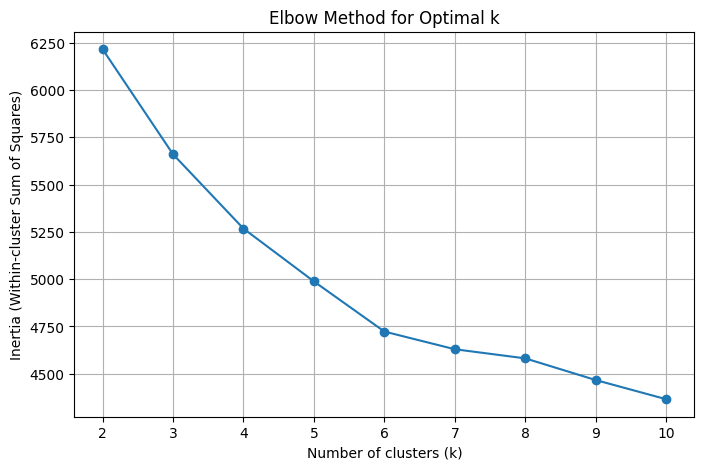

In [69]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare scaled data
X = feat[X_cols].fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute inertia for k = 2..10
inertias = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8,5))
plt.plot(K, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [70]:
best_k = 5
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init="auto")
feat["diet_cluster"] = kmeans.fit_predict(X_scaled)

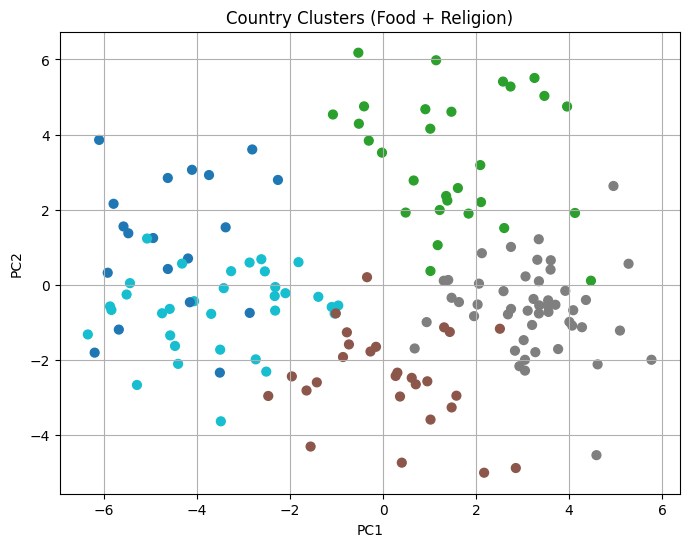

In [71]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=feat["diet_cluster"], cmap="tab10", s=40)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Country Clusters (Food + Religion)")
plt.grid(True)
plt.show()

In [72]:
cluster_summary = (
    feat.groupby("diet_cluster")[religion_cols + ["no_pork_flag", "low_beef_flag"]]
    .mean()
    .round(2)
)
display(cluster_summary)

,%Christian,%Muslim,%Hindu,%Buddhist,%Jewish,%Unaffiliated,%Other,no_pork_flag,low_beef_flag
diet_cluster,,,,,,,,,
0,9.34,54.53,10.93,22.90,0.00,0.81,1.49,0.58,0.11
1,8.85,80.17,3.62,1.82,2.67,2.34,0.53,0.86,0.00
2,65.25,7.25,3.89,2.87,0.03,16.29,4.41,0.07,0.00
3,72.55,3.91,0.30,0.36,0.18,21.45,1.25,0.00,0.00
4,86.11,5.79,0.06,0.03,0.01,5.72,2.27,0.03,0.00


In [73]:
for c in sorted(feat["diet_cluster"].unique()):
    countries = feat.loc[feat["diet_cluster"] == c, "Area_norm"].tolist()
    print(f"\nCluster {c} — {len(countries)} countries")
    print(", ".join(countries))


Cluster 0 — 19 countries
Bangladesh, Bhutan, Burkina Faso, Cambodia, Comoros, Ethiopia, Gambia, Guinea, Guinea-Bissau, India, Indonesia, Myanmar, Nepal, Niger, Senegal, Sierra Leone, Sri Lanka, Thailand, Yemen

Cluster 1 — 29 countries
Afghanistan, Albania, Algeria, Azerbaijan, Bahrain, Djibouti, Egypt, Iraq, Israel, Jordan, Kazakhstan, Kuwait, Kyrgyzstan, Lebanon, Libya, Mauritania, Mauritius, Mongolia, Morocco, North Macedonia, Oman, Pakistan, Qatar, Saudi Arabia, Tajikistan, Tunisia, Turkmenistan, United Arab Emirates, Uzbekistan

Cluster 2 — 27 countries
Bahamas, Barbados, China, Hong Kong, Taiwan, Colombia, Dominican Republic, Fiji, French Polynesia, Grenada, Guyana, Jamaica, Kiribati, Malaysia, Maldives, Mexico, New Zealand, Panama, Peru, Samoa, Sao Tome and Principe, Seychelles, Suriname, Tonga, Trinidad and Tobago, Vanuatu, Vietnam

Cluster 3 — 48 countries
Argentina, Armenia, Australia, Austria, Belarus, Belgium, Brazil, Bulgaria, Canada, Chile, Costa Rica, Croatia, Cyprus, C

In [74]:
cluster_countries = (
    feat[["Area_norm", "diet_cluster"]]
    .sort_values("diet_cluster")
    .reset_index(drop=True)
)
display(cluster_countries)

,Area_norm,diet_cluster
0,Bangladesh,0
1,Cambodia,0
2,Burkina Faso,0
3,Bhutan,0
4,Comoros,0
...,...,...
151,Solomon Islands,4
152,Timor-Leste,4
153,Uganda,4
154,Zambia,4


In [75]:
# Creating diets for each cluster 

food_items = [
    "Beef and Veal","Pork","Lamb","Chicken","Cured Meat","Sausages","Fish","Shellfish","Canned Tuna",
    "Eggs","Butter","Milk","Cheese","Cooking Oil","Sliced Meats","Canned fish","Yogurt","Ice Cream",
    "Bread","Sugar","Flour","Salt","Rice","Pasta & Noodles","Cereal","Coffee","Tea","Chocolate",
    "Cookies","Preserves, jam & jelly","Soft Drinks","Bottled Water","Baby Food","Condiments",
    "Packaged snacks","Beans","Preserved Vegetables","Preserved Fruit","Fruit Juice","Fresh Fruit",
    "Fresh Vegetables","Tubers"
]

# Broad food groups for simple macro/micronutrient floors
category_map = {
    "Beef and Veal":"meat","Pork":"meat","Lamb":"meat","Chicken":"meat","Cured Meat":"meat","Sausages":"meat",
    "Fish":"fish","Shellfish":"fish","Canned Tuna":"fish","Canned fish":"fish",
    "Eggs":"eggs",
    "Milk":"dairy","Yogurt":"dairy","Cheese":"dairy","Butter":"fats",
    "Cooking Oil":"fats",
    "Bread":"grains","Flour":"grains","Rice":"grains","Pasta & Noodles":"grains","Cereal":"grains",
    "Fresh Vegetables":"veg","Preserved Vegetables":"veg","Fresh Fruit":"fruit","Preserved Fruit":"fruit","Fruit Juice":"sugar",
    "Tubers":"starchy_roots","Beans":"legumes",
    "Sugar":"sugar","Chocolate":"sugar","Cookies":"sugar","Ice Cream":"sugar",
    "Coffee":"beverages","Tea":"beverages","Soft Drinks":"beverages","Bottled Water":"beverages","Juice":"sugar",
    "Sliced Meats":"meat","Salt":"condiments","Condiments":"condiments","Packaged snacks":"snacks",
    "Baby Food":"other","Preserves, jam & jelly":"sugar"
}

In [80]:
import numpy as np
import pandas as pd

meta = food_item_final.copy()
meta.rename(columns={"Standard_Amounts":"std_amt","Standard_Units":"unit"}, inplace=True)
meta["unit"] = meta["unit"].str.strip().str.upper()

# Lookups
density_by_item = {        # kg per liter (approx)
    "Bottled Water": 1.00,
    "Milk": 1.03,
    "Fruit Juice": 1.04,
    "Soft Drinks": 1.04,
    "Cooking Oil": 0.92,   # vegetable oil
}

per_unit_grams = {         # grams per UNIT (approx)
    "Eggs": 50,            # 50 g/egg shell-on avg
    "Tea": 2,              # 2 g per sachet
    # add others if you ever have UNIT items later
}

def kcal_per_kg_row(row):
    kcal = row["Energy_kcal"]
    amt  = row["std_amt"]
    unit = row["unit"]
    item = row["Final_Item"]

    if kcal == 0:
        return 0.0
    if unit == "G":
        # kcal given per 'amt' grams - per kg
        return (kcal / amt) * 1000.0
    if unit == "L":
        dens = density_by_item.get(item)
        if dens is None or dens <= 0:
            return np.nan
        mass_kg = amt * dens              # std_amt liters * kg/L = kg
        return kcal / mass_kg
    if unit == "UNIT":
        g_per_unit = per_unit_grams.get(item)
        if g_per_unit is None or g_per_unit <= 0:
            return np.nan
        mass_kg = (amt * g_per_unit) / 1000.0
        return kcal / mass_kg
    return np.nan

# Recompute from scratch
meta["kcal_per_kg"] = meta.apply(kcal_per_kg_row, axis=1)

# sanity clip & quick QA
def sanity_flag(x):
    if pd.isna(x): return "NA"
    if x == 0: return "zero"
    if x < 50: return "low?"
    if x > 11000: return "high?"
    return "ok"

meta["kcal_kg_flag"] = meta["kcal_per_kg"].apply(sanity_flag)

# Attach categories (reuse mapping)
meta["category"] = meta["Final_Item"].map(category_map).fillna("other")

# Show any remaining issues to fix
print("Remaining NA kcal/kg rows:")
display(meta[meta["kcal_kg_flag"].isin(["NA","low?","high?"])][
    ["Final_Item","std_amt","unit","Energy_kcal","kcal_per_kg","kcal_kg_flag"]
])

Remaining NA kcal/kg rows:


,Final_Item,std_amt,unit,Energy_kcal,kcal_per_kg,kcal_kg_flag
12,Coffee,500.0,G,5.1,10.2,low?
39,Tea,100.0,UNIT,5.0,25.0,low?


In [81]:
meta

,Final_Item,std_amt,unit,Energy_kcal,Protein,Carbs,Fat,kcal_per_kg,kcal_kg_flag,category
0,Baby Food,500.0,G,256.3,0.03,0.85,0.12,512.600000,ok,other
1,Beans,500.0,G,470.5,0.18,0.79,0.03,941.000000,ok,legumes
2,Beef and Veal,250.0,G,646.7,0.41,0.00,0.59,2586.800000,ok,meat
3,Bottled Water,1.5,L,0.0,0.00,0.00,0.00,0.000000,zero,beverages
4,Bread,500.0,G,1327.6,0.13,0.76,0.11,2655.200000,ok,grains
5,Butter,500.0,G,3642.9,0.00,0.00,1.00,7285.800000,ok,fats
6,Canned Tuna,125.0,G,159.9,0.78,0.00,0.22,1279.200000,ok,fish
7,Canned fish,125.0,G,159.9,0.78,0.00,0.22,1279.200000,ok,fish
8,Cereal,500.0,G,1875.0,0.12,0.73,0.15,3750.000000,ok,grains
9,Cheese,250.0,G,1008.9,0.23,0.03,0.74,4035.600000,ok,dairy


In [83]:
food_cols = [c for c in meta["Final_Item"] if c in feat.columns]
print("Food columns in feat:", len(food_cols))
print(set(meta["Final_Item"]) - set(food_cols))

Food columns in feat: 41
{'Salt'}


In [84]:
# Add 'Salt' column as 0 kg per capita per year (no caloric impact anyway)
feat["Salt"] = 0.0

# Then proceed
food_cols = meta["Final_Item"].tolist()
cluster_supply = (
    feat.groupby("diet_cluster")[food_cols]
        .mean()
        .reset_index()
)

In [86]:
TARGET_KCAL = 2300  # kcal/day/adult

In [87]:
m = cluster_supply.melt("diet_cluster", var_name="Final_Item", value_name="kg_per_year")
m = m.merge(meta[["Final_Item","kcal_per_kg","category"]], on="Final_Item", how="left")
m["kcal_per_day"] = m["kg_per_year"] * m["kcal_per_kg"] / 365.0

In [88]:
cluster_tot = m.groupby("diet_cluster", as_index=False)["kcal_per_day"].sum()
cluster_tot.rename(columns={"kcal_per_day":"kcal_day_current"}, inplace=True)

m = m.merge(cluster_tot, on="diet_cluster")
m["scale"] = TARGET_KCAL / m["kcal_day_current"]
m["kcal_day_scaled"] = m["kcal_per_day"] * m["scale"]
m["kg_day_scaled"]   = m["kcal_day_scaled"] / m["kcal_per_kg"].replace(0,np.nan)

In [89]:
floors = {"veg":0.06,"fruit":0.04,"legumes":0.03,"dairy":0.05}
caps   = {"sugar":0.10,"fats":0.35}

def enforce(df):
    df = df.copy()
    df["share"] = df["kcal_day_scaled"] / df["kcal_day_scaled"].sum()

    # floors
    for g,f in floors.items():
        cur = df.loc[df["category"]==g,"share"].sum()
        if cur < f:
            need = f - cur
            mask = df["category"]==g
            df.loc[mask,"share"] += need * (df.loc[mask,"share"]/df.loc[mask,"share"].sum())
            df.loc[~mask,"share"] *= (1-need)/df.loc[~mask,"share"].sum()

    # caps
    for g,c in caps.items():
        cur = df.loc[df["category"]==g,"share"].sum()
        if cur > c:
            excess = cur - c
            mask = df["category"]==g
            df.loc[mask,"share"] *= c/cur
            df.loc[~mask,"share"] *= (1+excess/df.loc[~mask,"share"].sum())

    df["share"] /= df["share"].sum()
    df["kcal_day_final"] = df["share"] * TARGET_KCAL
    df["kg_day_final"]   = df["kcal_day_final"] / df["kcal_per_kg"].replace(0,np.nan)
    return df

diet_cluster_plan = (
    m.groupby("diet_cluster", group_keys=False)
     .apply(enforce)
     .reset_index(drop=True)
)

/tmp/ipykernel_751824/1106085289.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(enforce)


In [90]:
diet_cluster_plan.to_csv("cluster_diet_plan_2300kcal.csv", index=False)
print(diet_cluster_plan.groupby("diet_cluster")["kcal_day_final"].sum().round(1))

diet_cluster
0    2300.0
1    2300.0
2    2300.0
3    2300.0
4    2300.0
Name: kcal_day_final, dtype: float64


In [92]:
## Example of USA cost (pulling its cluster's diest and calculating with US prices)

# Get USA cluster number
usa_cluster = int(feat.loc[feat["Area_norm"] == "United States", "diet_cluster"].iloc[0])
print(f"USA belongs to diet cluster: {usa_cluster}")

# Extract that cluster’s diet plan
usa_diet = diet_cluster_plan[diet_cluster_plan["diet_cluster"] == usa_cluster].copy()

USA belongs to diet cluster: 3


In [96]:
## Example of USA cost (pulling its cluster's diest and calculating with US prices)

#Params we can tweak
FIXED_KG_PER_DAY = {
    "Bottled Water": 1.00,   # ~1 L/day ≈ 1.0 kg
    "Soft Drinks":  0.33,    # ~330 ml/day ≈ 0.33 kg
    "Coffee":       0.010,   # 10 g/day (dry)
    "Tea":          0.002,   # 2 g/day (dry)
    "Salt":         0.005,   # 5 g/day
}

density_by_item = {  # kg/L (only needed if you ever convert L->kg elsewhere)
    "Bottled Water": 1.00,
    "Milk": 1.03,
    "Fruit Juice": 1.04,
    "Soft Drinks": 1.04,
    "Cooking Oil": 0.92,
}

per_unit_grams = {   # grams per UNIT
    "Eggs": 50,
    "Tea": 2,
}

# USA cluster and diet pattern (2300 kcal/day)
usa_cluster = int(feat.loc[feat["Area_norm"] == "United States", "diet_cluster"].iloc[0])
usa_diet = (diet_cluster_plan
            .loc[diet_cluster_plan["diet_cluster"] == usa_cluster, ["Final_Item","kg_day_final","category"]]
            .copy())

# Build USD price per kg from merged_items + meta
# Need package mass in kg for each Final_Item to convert per-pack USD to per-kg USD
mi = final_item_prices.copy()
mi["Countries_norm"] = mi["Countries"].replace({"United States of America": "United States"})

# Attach standard amounts/units
mi = mi.merge(
    meta[["Final_Item","std_amt","unit"]],
    on="Final_Item", how="left", validate="m:1"
)

def package_mass_kg(row):
    unit = str(row["unit"]).upper() if pd.notna(row["unit"]) else None
    amt  = row["std_amt"]
    item = row["Final_Item"]
    if pd.isna(amt): return np.nan
    if unit == "G":
        return amt / 1000.0
    if unit == "L":
        dens = density_by_item.get(item, 1.0)
        return amt * dens
    if unit == "UNIT":
        g_per_unit = per_unit_grams.get(item, np.nan)
        if pd.isna(g_per_unit): return np.nan
        return (amt * g_per_unit) / 1000.0
    return np.nan

mi["package_kg"] = mi.apply(package_mass_kg, axis=1)

# Use usd_low_price directly
if "usd_low_price" not in mi.columns:
    raise KeyError("merged_items is missing 'usd_low_price'. Compute it once, or share columns to adjust.")

mi["usd_price_per_kg"] = mi["usd_low_price"] / mi["package_kg"]

usa_prices = (mi.loc[mi["Countries_norm"]=="United States", ["Final_Item","usd_price_per_kg"]]
                .dropna(subset=["usd_price_per_kg"])
                .drop_duplicates("Final_Item"))

# Inject fixed daily quantities for non-caloric / customary items
usa_diet["kg_day_final"] = usa_diet.apply(
    lambda r: FIXED_KG_PER_DAY[r["Final_Item"]]
              if r["Final_Item"] in FIXED_KG_PER_DAY else r["kg_day_final"],
    axis=1
)

# If an item is missing entirely, append it with fixed qty
missing_fixed = [it for it in FIXED_KG_PER_DAY if it not in usa_diet["Final_Item"].values]
if missing_fixed:
    add_df = pd.DataFrame({
        "Final_Item": missing_fixed,
        "kg_day_final": [FIXED_KG_PER_DAY[it] for it in missing_fixed],
        "category": meta.set_index("Final_Item").loc[missing_fixed, "category"].tolist()
    })
    usa_diet = pd.concat([usa_diet, add_df], ignore_index=True)

# Merge diet with prices and compute USA daily/monthly cost
usa_diet_cost = usa_diet.merge(usa_prices, on="Final_Item", how="left")

# fill missing prices with global median per item
if usa_diet_cost["usd_price_per_kg"].isna().any():
    global_item_price = (mi.groupby("Final_Item")["usd_price_per_kg"].median())
    usa_diet_cost["usd_price_per_kg"] = usa_diet_cost.apply(
        lambda r: global_item_price.get(r["Final_Item"], np.nan) if pd.isna(r["usd_price_per_kg"]) else r["usd_price_per_kg"],
        axis=1
    )

usa_diet_cost["usd_per_day"] = usa_diet_cost["kg_day_final"] * usa_diet_cost["usd_price_per_kg"]
daily_cost   = usa_diet_cost["usd_per_day"].sum()
monthly_cost = daily_cost * 30

print(f"USA (cluster {usa_cluster}) food cost:")
print(f"  • per adult per day   : ${daily_cost:,.2f}")
print(f"  • per adult per month : ${monthly_cost:,.2f}")

USA (cluster 3) food cost:
  • per adult per day   : $14.43
  • per adult per month : $432.76


In [97]:
# Breakdown to see where $$ goes
print("\nDaily cost by category (USD):")
print(usa_diet_cost.groupby("category")["usd_per_day"].sum().sort_values(ascending=False).round(2))

# Optional: top items by daily spend
print("\nTop 10 items by daily spend (USD):")
print(usa_diet_cost.sort_values("usd_per_day", ascending=False)[["Final_Item","usd_per_day"]].head(10).round(2))


Daily cost by category (USD):
category
veg              8.41
beverages        1.35
grains           1.14
snacks           1.00
dairy            0.84
fats             0.43
sugar            0.36
legumes          0.29
meat             0.26
fruit            0.17
fish             0.13
starchy_roots    0.03
condiments       0.02
eggs             0.01
other            0.00
Name: usd_per_day, dtype: float64

Top 10 items by daily spend (USD):
              Final_Item  usd_per_day
30  Preserved Vegetables         5.26
21      Fresh Vegetables         3.15
26       Packaged snacks         1.00
3          Bottled Water         0.65
8                 Cereal         0.59
41                Yogurt         0.58
37           Soft Drinks         0.49
15           Cooking Oil         0.38
4                  Bread         0.29
1                  Beans         0.29


In [105]:
# Checking countries in the same cluster #3 as the US

import pandas as pd
import numpy as np

# SAFE COPIES
feat_copy   = feat.copy()
meta_copy   = meta.copy()
diet_copy   = diet_cluster_plan.copy()
prices_copy = final_item_prices.copy()

# Fixed daily quantities (kcal-irrelevant but cost-relevant)
FIXED_KG_PER_DAY = {
    "Bottled Water": 1.00,   # ~1 L/day
    "Soft Drinks":  0.33,    # ~330 ml/day
    "Coffee":       0.010,   # 10 g/day (dry)
    "Tea":          0.002,   # 2 g/day (dry)
    "Salt":         0.005,   # 5 g/day
}

# Unit helpers for package mass (from final_item_prices)
density_by_item = {
    "Bottled Water": 1.00,
    "Milk": 1.03,
    "Fruit Juice": 1.04,
    "Soft Drinks": 1.04,
    "Cooking Oil": 0.92,
}
per_unit_grams = {"Eggs": 50, "Tea": 2}

def compute_package_mass_from_prices(row):
    unit = str(row["Standard_Units"]).upper() if pd.notna(row["Standard_Units"]) else None
    amt  = row["Standard_Amounts"]
    item = row["Final_Item"]
    if pd.isna(amt): return np.nan
    if unit == "G":   return amt / 1000.0
    if unit == "L":   return amt * density_by_item.get(item, 1.0)
    if unit == "UNIT":
        g = per_unit_grams.get(item, np.nan)
        return (amt * g) / 1000.0 if pd.notna(g) else np.nan
    return np.nan

# Normalize country names in prices to match feat_copy["Country_norm"] if possible
prices_copy["Countries_norm"] = prices_copy["Countries"].replace({
    "United States of America": "United States",
    "Czechia": "Czech Republic",
    "Republic of Korea": "South Korea",
    "Viet Nam": "Vietnam",
    "Russian Federation": "Russia",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "Netherlands (Kingdom of the)": "Netherlands",
    # add more if we see mismatches
})
prices_copy["Countries_norm"] = prices_copy["Countries_norm"].fillna(prices_copy["Countries"])

# Compute package_kg and usd_price_per_kg directly from final_item_prices
prices_copy["package_kg"] = prices_copy.apply(compute_package_mass_from_prices, axis=1)
prices_copy["usd_price_per_kg"] = prices_copy["usd_low_price"] / prices_copy["package_kg"]

# Global per-item median (for fallback when a country has missing price)
global_item_usd_per_kg = (prices_copy
                          .groupby("Final_Item", as_index=False)["usd_price_per_kg"]
                          .median()
                          .set_index("Final_Item")["usd_price_per_kg"])


In [106]:
def compute_country_cost(country_name: str, cluster_id: int) -> dict:
    # Cluster diet (2300 kcal/day) -> use kg_day_final
    cluster_diet = (diet_copy.query("diet_cluster == @cluster_id")
                    [["Final_Item","kg_day_final","category"]].copy())

    # Inject fixed daily quantities
    cluster_diet["kg_day_final"] = cluster_diet.apply(
        lambda r: FIXED_KG_PER_DAY.get(r["Final_Item"], r["kg_day_final"]),
        axis=1
    )
    # Add any fixed items missing from the plan
    missing_fixed = [it for it in FIXED_KG_PER_DAY if it not in cluster_diet["Final_Item"].values]
    if missing_fixed:
        add_df = pd.DataFrame({
            "Final_Item": missing_fixed,
            "kg_day_final": [FIXED_KG_PER_DAY[it] for it in missing_fixed],
            "category": meta_copy.set_index("Final_Item").loc[missing_fixed, "category"].tolist()
        })
        cluster_diet = pd.concat([cluster_diet, add_df], ignore_index=True)

    # Country-specific prices (USD per kg)
    c_prices = (prices_copy.loc[prices_copy["Countries_norm"] == country_name,
                                ["Final_Item","usd_price_per_kg"]]
                .drop_duplicates("Final_Item"))

    # Merge and fill missing with global per-item median
    df = cluster_diet.merge(c_prices, on="Final_Item", how="left")
    df["usd_price_per_kg"] = df.apply(
        lambda r: global_item_usd_per_kg.get(r["Final_Item"], np.nan)
                  if pd.isna(r["usd_price_per_kg"]) else r["usd_price_per_kg"],
        axis=1
    )

    # Compute costs
    df["usd_per_day"] = df["kg_day_final"] * df["usd_price_per_kg"]
    daily   = float(df["usd_per_day"].sum())
    monthly = daily * 30

    return {
        "Country": country_name,
        "Cluster": int(cluster_id),
        "Daily_USD": daily,
        "Monthly_USD": monthly
    }

In [108]:
# USA example
usa_cluster = int(feat_copy.loc[feat_copy["Area_norm"]=="United States", "diet_cluster"].iloc[0])
usa_result  = compute_country_cost("United States", usa_cluster)
print(usa_result)

# All countries in USA's cluster
countries_in_cluster = sorted(feat_copy.loc[feat_copy["diet_cluster"]==usa_cluster, "Area_norm"].unique())
results_cluster = [compute_country_cost(c, usa_cluster) for c in countries_in_cluster]
df_cluster_costs = pd.DataFrame(results_cluster).sort_values("Monthly_USD")
display(df_cluster_costs.head(48))

{'Country': 'United States', 'Cluster': 3, 'Daily_USD': 14.425315973386262, 'Monthly_USD': 432.75947920158785}


,Country,Cluster,Daily_USD,Monthly_USD
36,Romania,3,5.391512,161.745360
45,United Kingdom,3,6.244878,187.346349
37,Russia,3,7.060018,211.800554
4,Belarus,3,7.993674,239.810210
23,Ireland,3,8.051693,241.550792
1,Armenia,3,8.156375,244.691265
44,Ukraine,3,8.306217,249.186520
35,Portugal,3,9.249034,277.471024
39,Slovakia,3,9.479830,284.394915
28,Malta,3,10.203583,306.107496


In [109]:
all_results = []
for cl in sorted(diet_copy["diet_cluster"].unique()):
    cl_countries = sorted(feat_copy.loc[feat_copy["diet_cluster"]==cl, "Area_norm"].unique())
    for c in cl_countries:
        all_results.append(compute_country_cost(c, cl))

df_all_costs = pd.DataFrame(all_results)
# Summaries
display(df_all_costs.groupby("Cluster")["Monthly_USD"].describe().round(2))
display(df_all_costs.sort_values("Monthly_USD", ascending=False).head(10))

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,19.0,284.36,71.18,96.06,273.16,315.76,315.76,357.69
1,29.0,303.63,59.33,160.90,274.89,313.89,319.37,487.58
2,27.0,357.71,60.40,220.04,336.89,336.89,377.54,541.36
3,48.0,376.54,95.35,161.75,326.44,377.61,435.64,623.26
4,33.0,313.73,56.08,172.43,280.27,321.84,323.56,439.82


,Country,Cluster,Daily_USD,Monthly_USD
118,Switzerland,3,20.775220,623.256593
78,Austria,3,19.336927,580.107797
57,Hong Kong,2,18.045233,541.356997
89,Denmark,3,16.937428,508.122846
106,Netherlands,3,16.632762,498.982860
27,Israel,1,16.252597,487.577911
122,Uruguay,3,15.600782,468.023474
94,Germany,3,15.599305,467.979163
102,Luxembourg,3,15.397304,461.919108
64,Panama,2,15.385463,461.563883


In [110]:
# Save a clean version for future analysis
df_all_costs.to_csv("country_diet_costs_usd.csv", index=False)

# Quick summary
print(df_all_costs.shape)
display(df_all_costs.head())

(156, 4)


,Country,Cluster,Daily_USD,Monthly_USD
0,Bangladesh,0,7.677229,230.316858
1,Bhutan,0,10.525320,315.759606
2,Burkina Faso,0,10.525320,315.759606
3,Cambodia,0,11.495508,344.865253
4,Comoros,0,10.525320,315.759606


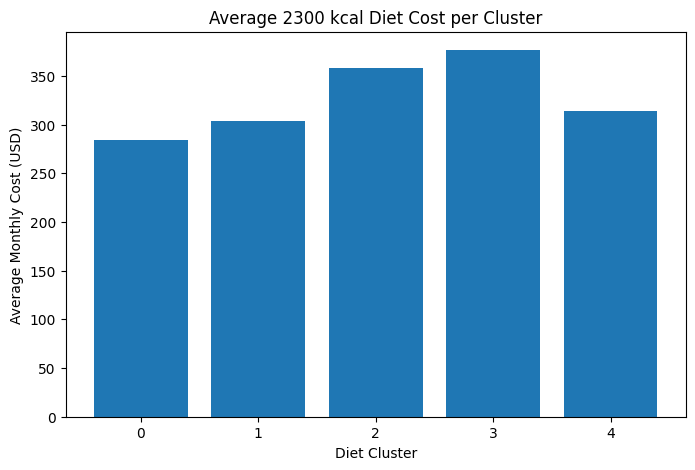

In [111]:
import matplotlib.pyplot as plt

cluster_summary = df_all_costs.groupby("Cluster")["Monthly_USD"].agg(["mean","min","max"]).reset_index()

plt.figure(figsize=(8,5))
plt.bar(cluster_summary["Cluster"], cluster_summary["mean"])
plt.xlabel("Diet Cluster")
plt.ylabel("Average Monthly Cost (USD)")
plt.title("Average 2300 kcal Diet Cost per Cluster")
plt.show()

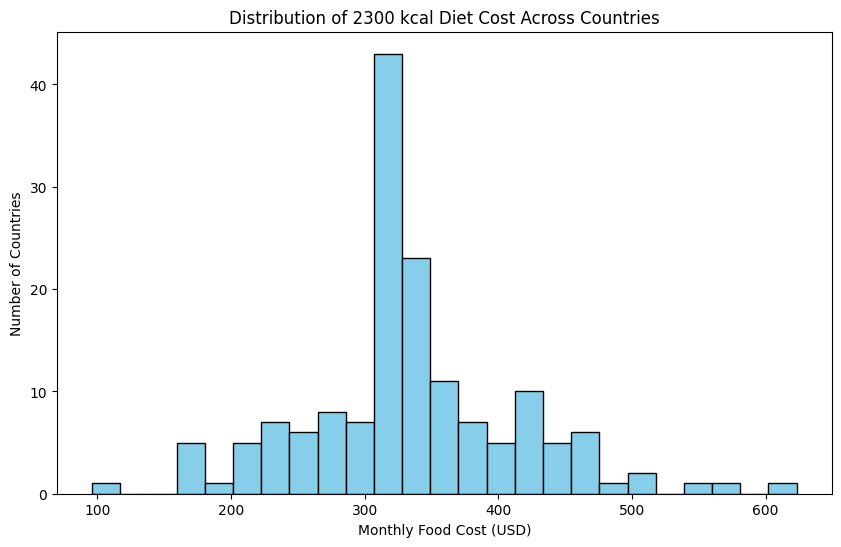

In [112]:
plt.figure(figsize=(10,6))
plt.hist(df_all_costs["Monthly_USD"], bins=25, color="skyblue", edgecolor="black")
plt.xlabel("Monthly Food Cost (USD)")
plt.ylabel("Number of Countries")
plt.title("Distribution of 2300 kcal Diet Cost Across Countries")
plt.show()

In [113]:
print("Top 10 Most Expensive Diets:")
display(df_all_costs.sort_values("Monthly_USD", ascending=False).head(10))

print("\nBottom 10 Cheapest Diets:")
display(df_all_costs.sort_values("Monthly_USD").head(10))

Top 10 Most Expensive Diets:


,Country,Cluster,Daily_USD,Monthly_USD
118,Switzerland,3,20.775220,623.256593
78,Austria,3,19.336927,580.107797
57,Hong Kong,2,18.045233,541.356997
89,Denmark,3,16.937428,508.122846
106,Netherlands,3,16.632762,498.982860
27,Israel,1,16.252597,487.577911
122,Uruguay,3,15.600782,468.023474
94,Germany,3,15.599305,467.979163
102,Luxembourg,3,15.397304,461.919108
64,Panama,2,15.385463,461.563883



Bottom 10 Cheapest Diets:


,Country,Cluster,Daily_USD,Monthly_USD
5,Ethiopia,0,3.202146,96.064370
25,Egypt,1,5.363206,160.896177
9,India,0,5.368474,161.054227
111,Romania,3,5.391512,161.745360
145,Nigeria,4,5.747640,172.429210
10,Indonesia,0,5.788674,173.660207
120,United Kingdom,3,6.244878,187.346349
112,Russia,3,7.060018,211.800554
39,Oman,1,7.173426,215.202792
137,Kenya,4,7.203263,216.097886


In [117]:
iq_countries = set(final_item_prices["Countries"].unique())
print(f"Global IQ countries: {len(iq_countries)}")

Global IQ countries: 130


In [119]:
computed_countries = set(df_all_costs["Country"].unique())

missing_from_iq = sorted(list(computed_countries - iq_countries))
in_both         = sorted(list(computed_countries & iq_countries))

print(f"Total computed countries: {len(computed_countries)}")
print(f"Countries in both (real Global IQ data): {len(in_both)}")
print(f"Missing from Global IQ (imputed via cluster medians): {len(missing_from_iq)}")
print("Examples of missing:", missing_from_iq[:46])

Total computed countries: 156
Countries in both (real Global IQ data): 110
Missing from Global IQ (imputed via cluster medians): 46
Examples of missing: ['Afghanistan', 'Bahamas', 'Barbados', 'Bhutan', 'Burkina Faso', 'Comoros', 'Democratic  the Congo', 'Eswatini', 'Fiji', 'French Polynesia', 'Gabon', 'Gambia', 'Grenada', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kiribati', 'Kyrgyzstan', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Maldives', 'Mauritania', 'Mauritius', 'Mongolia', 'Myanmar', 'Nepal', 'New Caledonia', 'Niger', 'Papua New Guinea', 'Rwanda', 'Samoa', 'Sao Tome and Principe', 'Sierra Leone', 'Solomon Islands', 'Tajikistan', 'Timor-Leste', 'Tonga', 'Vanuatu', 'Yemen', 'Zambia', 'Zimbabwe']


In [120]:
df_all_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      156 non-null    object 
 1   Cluster      156 non-null    int64  
 2   Daily_USD    156 non-null    float64
 3   Monthly_USD  156 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.0+ KB


In [121]:
df_all_costs.to_csv("df_all_costs.csv", index=False)
print("Saved:", len(df_all_costs), "rows to df_all_costs.csv")

Saved: 156 rows to df_all_costs.csv
